### Deadline 23.01.2022

# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [40]:
!pip install --force-reinstall tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.9.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (511.7 MB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-3.19.4-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached wrapt-1.14.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (75 kB)
  Using cached setuptools-62.6.0-py3-none-any.whl (1.2 MB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached grpcio-1.47.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


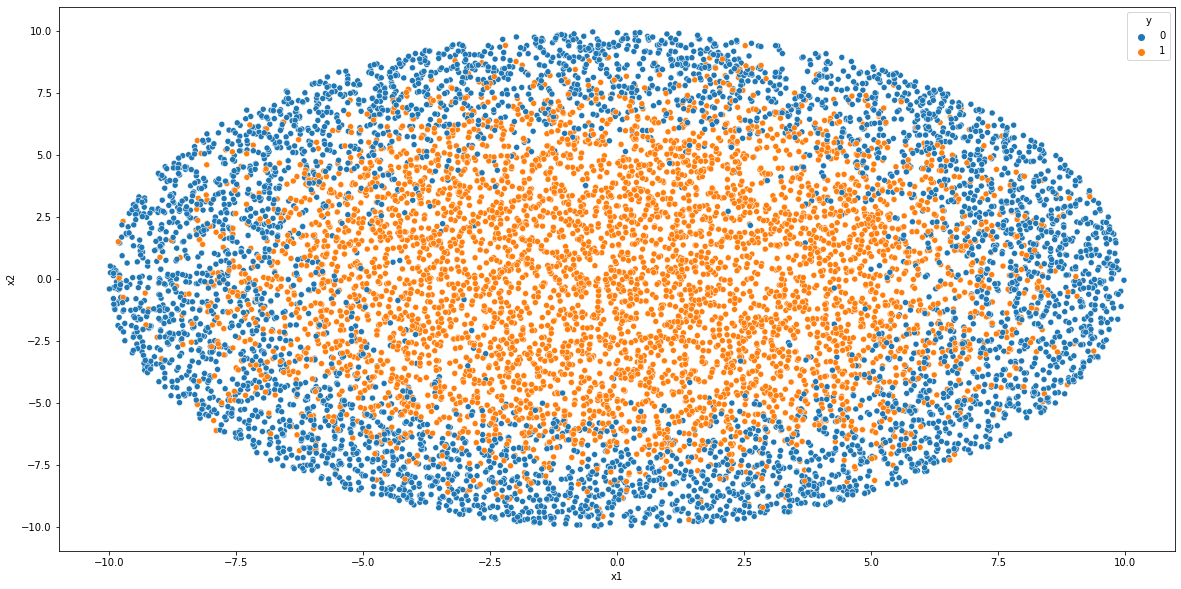

In [3]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

In [4]:
df.head(10)

,x1,x2,y
0,-4.626272,-6.658988,0
1,-7.789640,0.262519,0
2,-8.739678,1.537758,0
3,-2.546441,-7.705224,0
4,-2.751506,-7.940187,0
5,0.303440,5.969639,0
6,-5.920224,1.339210,1
7,-7.555594,0.733846,1
8,5.995393,-4.607815,0
9,1.465613,4.338939,1


После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5903030303030303


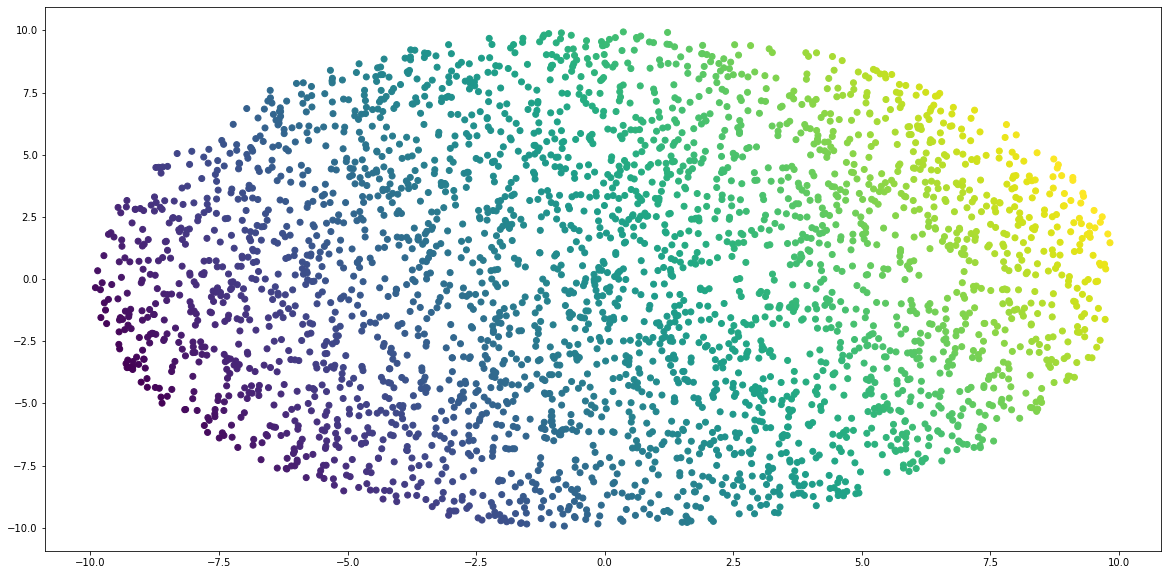

In [6]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии

lr = LogisticRegression()
lr.fit(X_train, y_train)
predict_logit = lr.predict(X_test)
predict_log_proba = lr.predict_log_proba(X_test)[:,1]

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8487878787878788


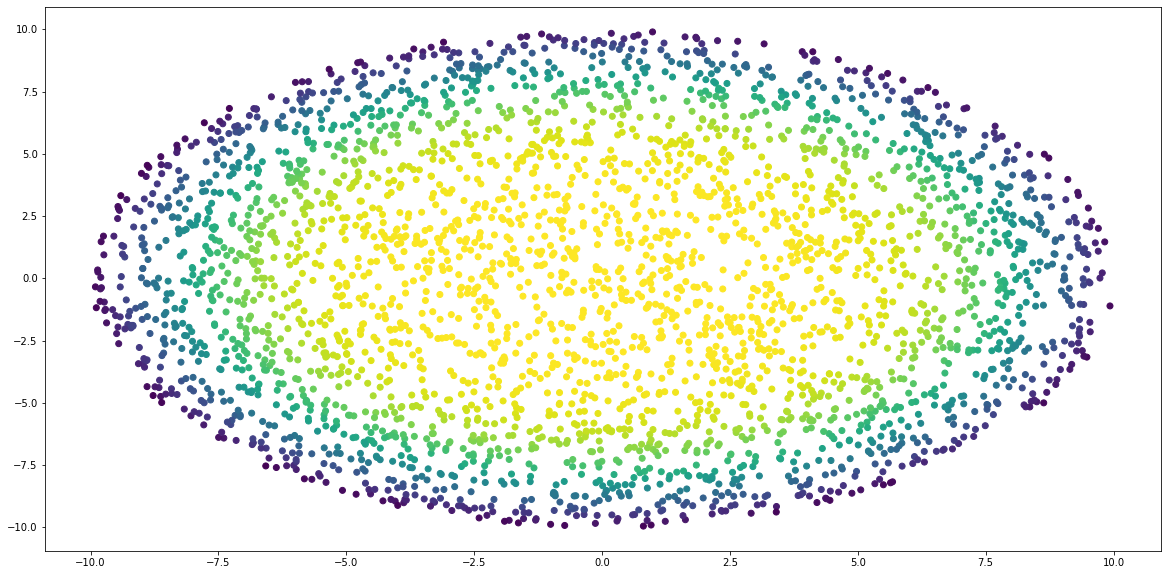

In [7]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = np.sqrt(df_new['x1']**2 + df_new['x2']**2)

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

lr.fit(X_train_new, y_train_new)
predict_logit = lr.predict(X_test_new)
predict_log_proba = lr.predict_log_proba(X_test_new)[:,1]

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba)
plt.show()

**MAGIC!!!** :0

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Точность нашей модели 0.7687878787878788


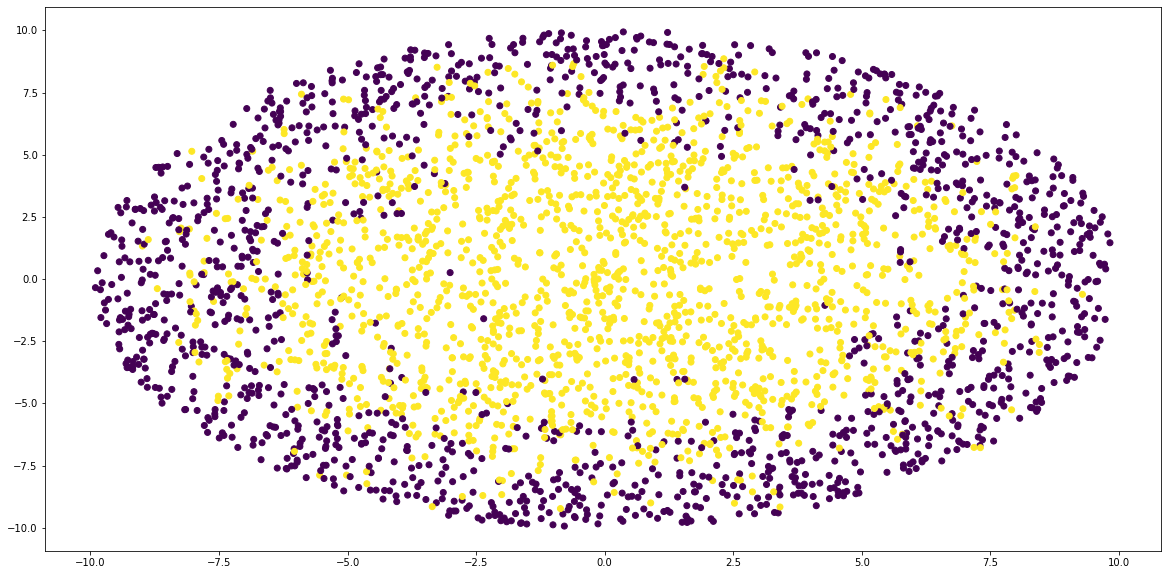

In [8]:
from sklearn.tree import DecisionTreeClassifier

#########################################
# Ваш код
dt = DecisionTreeClassifier(random_state = 10)
dt.fit(X_train, y_train)

predict_tree = dt.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = dt.predict_proba(X_test)[:,1]

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Точность нашей модели 0.816060606060606


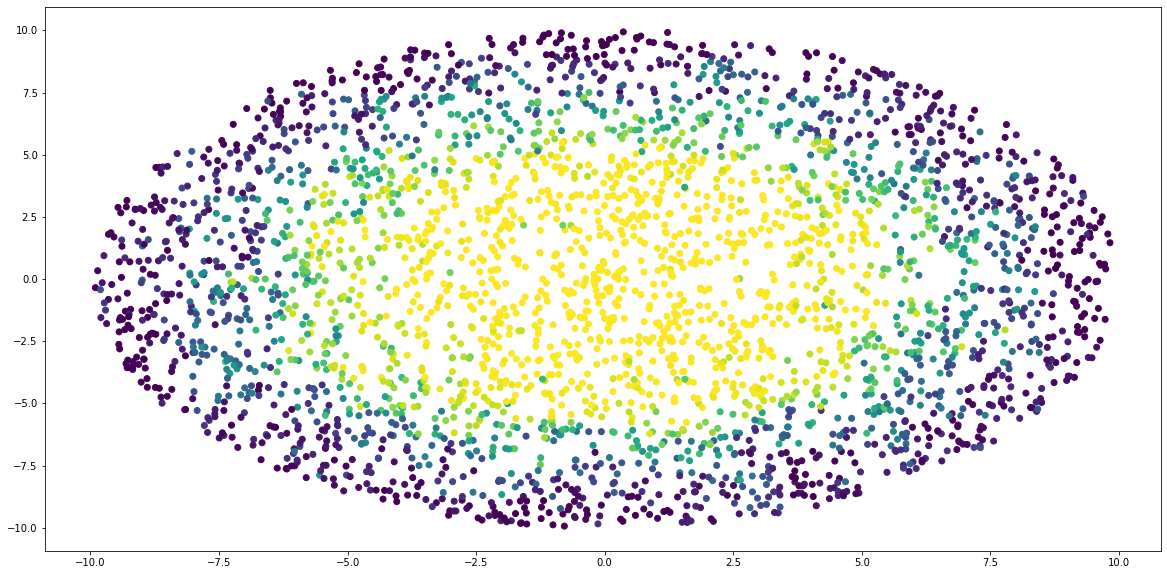

In [9]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

rf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rf.fit(X_train, y_train)

predict_forest = rf.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = rf.predict_proba(X_test)[:,1]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba)
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [10]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential   # Последовательность слоёв
import tensorflow.keras.layers as L              # Разные слои
import tensorflow.keras.optimizers as opt        # Оптимизаторы

2.9.1
2.9.0


In [12]:
from tensorflow.keras.metrics import Accuracy

def get_new_model( ):
    acc = Accuracy()

    ###########################################################
    # Ваш код! 
    model = Sequential(name = 'Benya')  # модели можно дать имя!
    
    # Добавляем в нашу модель первый слой из 5 нейронов
    model.add(L.Dense(5, input_dim = X_train.shape[1], kernel_initializer='random_normal'))

    # Добавляем функцию активации на первый слой 
    model.add(L.Activation('sigmoid'))

    # Добавляем ещё один слой из 5 нейронов
    model.add(L.Dense(5, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    # На выходе мы должны получить вероятности того, что объект относится к разным классам 
    # Сделать такое преобразование позволяет softmax как функция активации
    # На выход будет идти 4 вероятности по числу классов
    model.add(L.Dense(1, activation='softmax', kernel_initializer = 'random_normal'))
    
    ###########################################################
    
    # В качестве оптимизации будем использовать Adam
    # Это такой специальный градиентный спуск, обсудим его в следущий раз
    optimizer = opt.Adam(learning_rate=1e-3)

    # Собираем модель
    model.compile(loss = 'categorical_crossentropy', 
                  metrics=['acc'], 
                  optimizer=optimizer)
    
    return model

In [14]:
model = get_new_model()

In [15]:
model.summary()

Model: "Benya"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 activation (Activation)     (None, 5)                 0         
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 activation_1 (Activation)   (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [16]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=30, verbose=1)

Epoch 1/30
168/168 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - acc: 0.5099 - val_loss: 0.0000e+00 - val_acc: 0.4955
Epoch 2/30
168/168 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5099 - val_loss: 0.0000e+00 - val_acc: 0.4955
Epoch 3/30
168/168 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5099 - val_loss: 0.0000e+00 - val_acc: 0.4955
Epoch 4/30
168/168 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5099 - val_loss: 0.0000e+00 - val_acc: 0.4955
Epoch 5/30
168/168 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5099 - val_loss: 0.0000e+00 - val_acc: 0.4955
Epoch 6/30
168/168 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5099 - val_loss: 0.0000e+00 - val_acc: 0.4955
Epoch 7/30
168/168 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5099 - val_loss: 0.0000e+00 - val_acc: 0.4955
Epoch 8/30
168/168 [

104/104 [==============================] - 0s 1ms/step
Точность нашей модели 0.48484848484848486


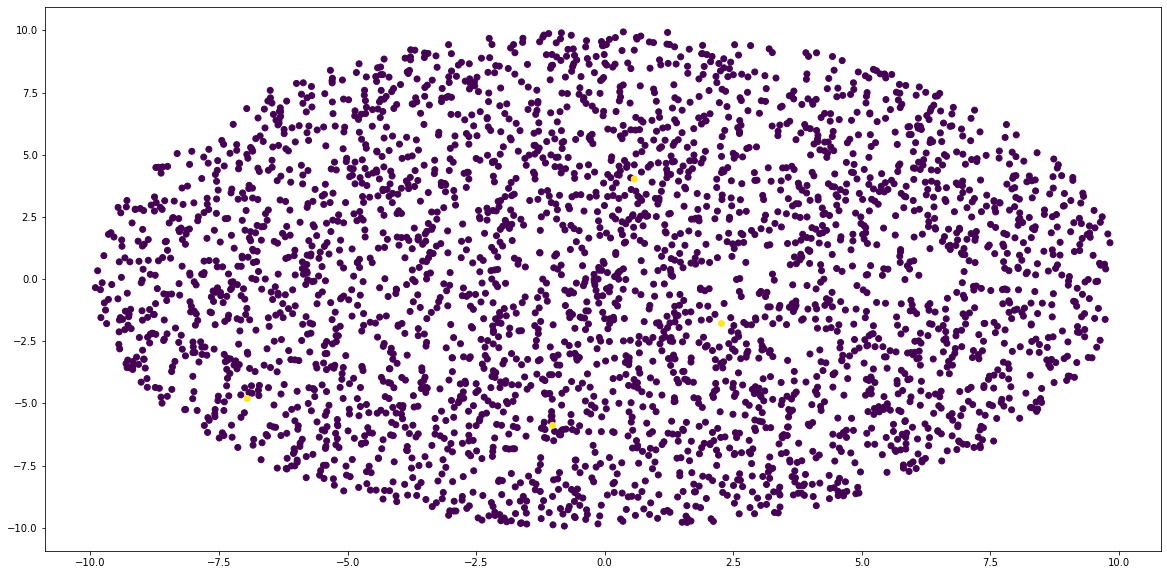

In [26]:
#########################################
# Ваш код

predict_neural = model.predict(X_test)
predict_classes = tf.argmax(model.predict(X_test), axis = 1)

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)